In [1]:
# Importing libraries
import pandas as pd
import numpy as np

In [2]:
# Reading dataset
df = pd.read_csv('country_wise_latest.csv')
df.head()

,Country/Region,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Deaths / 100 Cases,Recovered / 100 Cases,Deaths / 100 Recovered,Confirmed last week,1 week change,1 week % increase,WHO Region
0,Afghanistan,36263,1269,25198,9796,106,10,18,3.50,69.49,5.04,35526,737,2.07,Eastern Mediterranean
1,Albania,4880,144,2745,1991,117,6,63,2.95,56.25,5.25,4171,709,17.00,Europe
2,Algeria,27973,1163,18837,7973,616,8,749,4.16,67.34,6.17,23691,4282,18.07,Africa
3,Andorra,907,52,803,52,10,0,0,5.73,88.53,6.48,884,23,2.60,Europe
4,Angola,950,41,242,667,18,1,0,4.32,25.47,16.94,749,201,26.84,Africa


📊 Dataset Description: COVID-19 Statistics by Country
This dataset contains COVID-19 statistics for 187 countries or regions. It provides a snapshot of the pandemic situation, with cumulative and weekly data.

🔢 Columns and Their Meanings:
Column Name	Description
Country/Region	Name of the country or region.
Confirmed	Total number of confirmed COVID-19 cases.
Deaths	Total number of deaths attributed to COVID-19.
Recovered	Total number of patients who have recovered.
Active	Current active cases (usually Confirmed - Deaths - Recovered).
New cases	Number of new cases reported on the latest day.
New deaths	Number of new deaths reported on the latest day.
New recovered	Number of new recoveries reported on the latest day.
Deaths / 100 Cases	Death rate per 100 confirmed cases.
Recovered / 100 Cases	Recovery rate per 100 confirmed cases.
Deaths / 100 Recovered	Deaths per 100 recovered patients — a measure of mortality vs. recovery.
Confirmed last week	Total confirmed cases one week ago.
1 week change	Increase in confirmed cases over the past week.
1 week % increase	Percentage growth of confirmed cases in the past week.
WHO Region	World Health Organization (WHO) region the country belongs to (e.g., Europe, Africa).

🧠 Insights & Usage:
Epidemiological Analysis: Track spread, severity, and recovery patterns globally.

Risk Assessment: Compare recovery and death ratios across regions.

Growth Trends: Analyze weekly trends in confirmed cases.

Regional Breakdown: Study pandemic behavior by WHO region.

In [3]:
# To get the column names
df.columns

Index(['Country/Region', 'Confirmed', 'Deaths', 'Recovered', 'Active',
       'New cases', 'New deaths', 'New recovered', 'Deaths / 100 Cases',
       'Recovered / 100 Cases', 'Deaths / 100 Recovered',
       'Confirmed last week', '1 week change', '1 week % increase',
       'WHO Region'],
      dtype='object')

In [4]:
# Drop unnecessary columns
columns_to_drop = [
    'Active', 'Deaths / 100 Cases', 'Recovered / 100 Cases',
    'Deaths / 100 Recovered', 'Confirmed last week',
    '1 week change', '1 week % increase', 'WHO Region'
]
df.drop(columns=columns_to_drop, inplace=True)
df.head()

,Country/Region,Confirmed,Deaths,Recovered,New cases,New deaths,New recovered
0,Afghanistan,36263,1269,25198,106,10,18
1,Albania,4880,144,2745,117,6,63
2,Algeria,27973,1163,18837,616,8,749
3,Andorra,907,52,803,10,0,0
4,Angola,950,41,242,18,1,0


In [5]:
# To get the information about dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 187 entries, 0 to 186
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Country/Region  187 non-null    object
 1   Confirmed       187 non-null    int64 
 2   Deaths          187 non-null    int64 
 3   Recovered       187 non-null    int64 
 4   New cases       187 non-null    int64 
 5   New deaths      187 non-null    int64 
 6   New recovered   187 non-null    int64 
dtypes: int64(6), object(1)
memory usage: 10.4+ KB


In [6]:
# To find the null values
df.isnull().sum()

,0
Country/Region,0
Confirmed,0
Deaths,0
Recovered,0
New cases,0
New deaths,0
New recovered,0


There is no Null values , so no need to handle null values

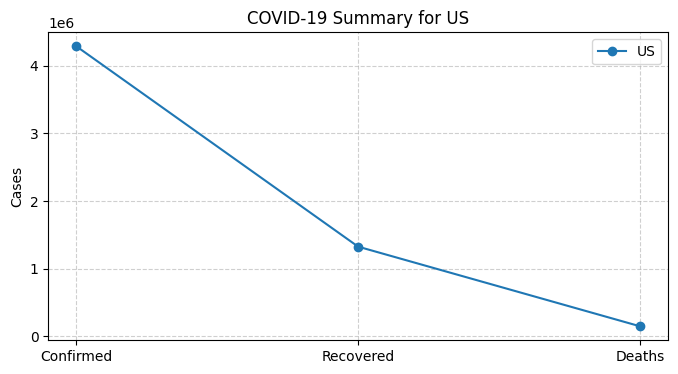

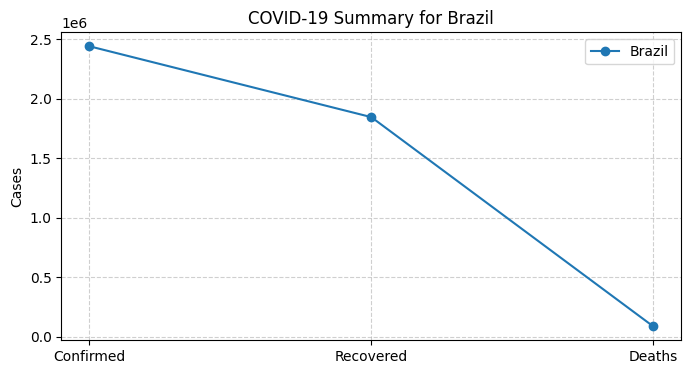

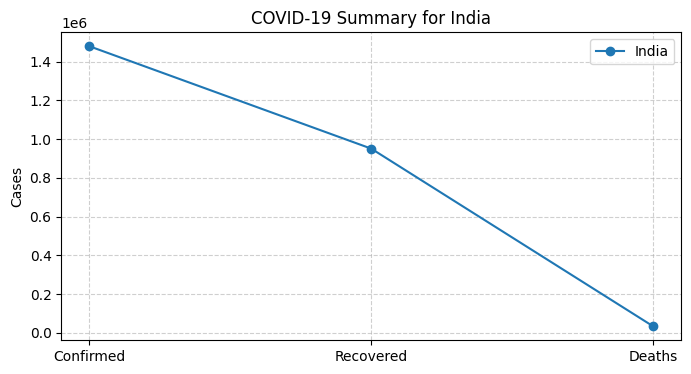

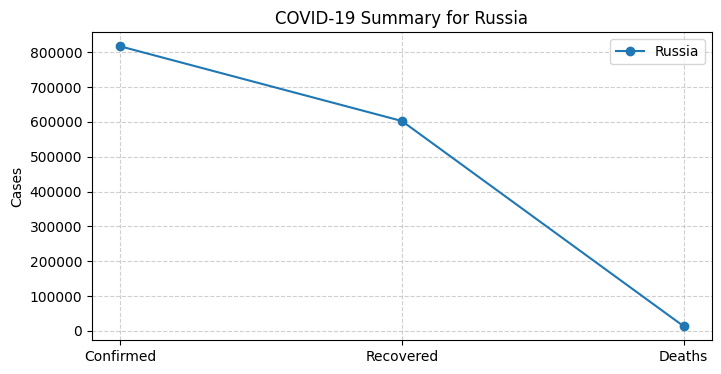

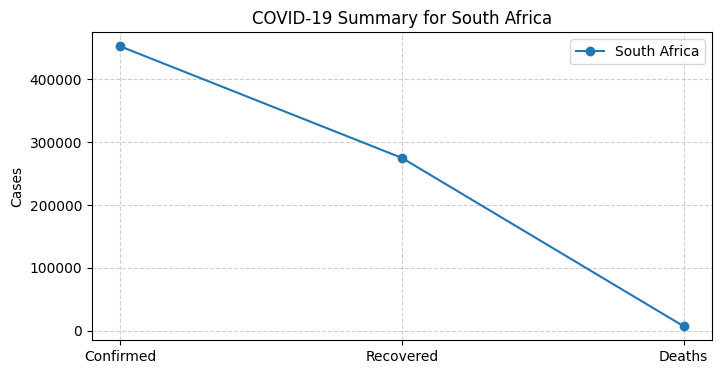

In [7]:
# Plot Confirmed, Recovered, and Deaths across top countries.
import matplotlib.pyplot as plt

top_countries = df.sort_values(by='Confirmed', ascending=False).head(5)

for _, row in top_countries.iterrows():
    country = row['Country/Region']
    confirmed = row['Confirmed']
    recovered = row['Recovered']
    deaths = row['Deaths']

    plt.figure(figsize=(8, 4))
    plt.plot(['Confirmed', 'Recovered', 'Deaths'], [confirmed, recovered, deaths],label=country,marker='o')
    plt.legend()
    plt.title(f'COVID-19 Summary for {country}')
    plt.ylabel('Cases')
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.savefig(f'{country}_covid_summary.png')
    plt.show()

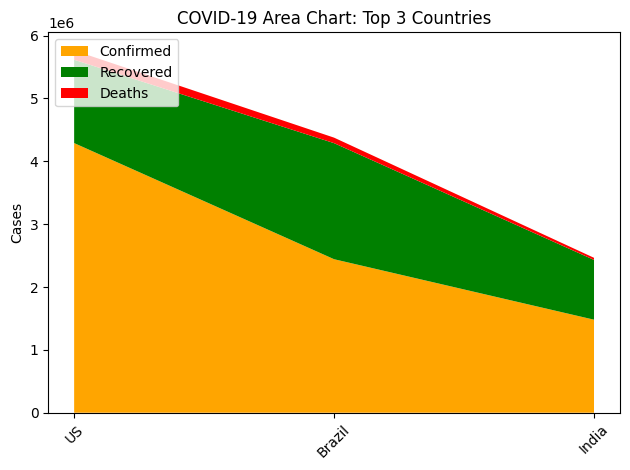

In [8]:
# Area Chart for top 3 countries
top_3 = df.sort_values(by='Confirmed', ascending=False).head(3)

plt.stackplot(top_3['Country/Region'],
              top_3['Confirmed'],
              top_3['Recovered'],
              top_3['Deaths'],
              labels=['Confirmed', 'Recovered', 'Deaths'],
              colors=['orange', 'green', 'red'])

plt.legend(loc='upper left')
plt.title("COVID-19 Area Chart: Top 3 Countries")
plt.ylabel("Cases")
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('covid_area_chart.png')
plt.show()


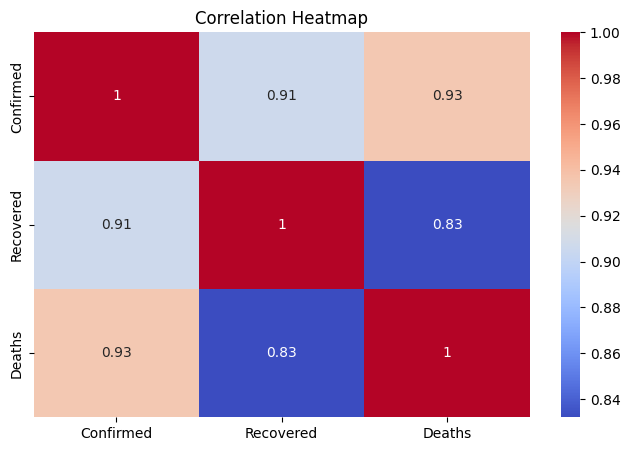

In [9]:
# Heatmap with respect to Confirmed, Recovered and Deaths
import seaborn as sns

plt.figure(figsize=(8, 5))
sns.heatmap(df[['Confirmed', 'Recovered', 'Deaths']].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.savefig('correlation_heatmap.png')
plt.show()

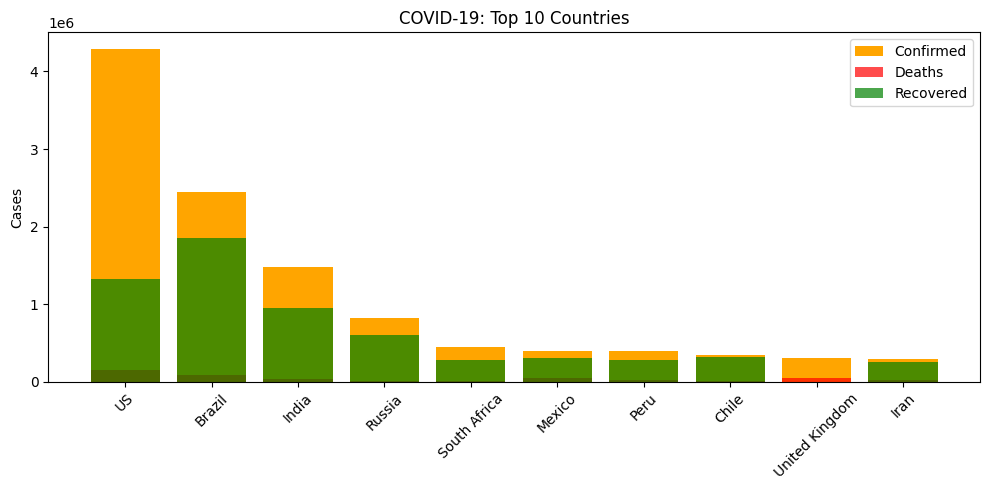

In [10]:
# Bar chart with respect to confirmed, deaths and recovered
top_countries = df.sort_values(by='Confirmed', ascending=False).head(10)

plt.figure(figsize=(10, 5))
plt.bar(top_countries['Country/Region'], top_countries['Confirmed'], label='Confirmed', color='orange')
plt.bar(top_countries['Country/Region'], top_countries['Deaths'], label='Deaths', color='red', alpha=0.7)
plt.bar(top_countries['Country/Region'], top_countries['Recovered'], label='Recovered', color='green', alpha=0.7)

plt.xticks(rotation=45)
plt.title('COVID-19: Top 10 Countries')
plt.ylabel('Cases')
plt.legend()
plt.tight_layout()
plt.savefig('covid_bar_chart.png')
plt.show()